In [74]:
import pandas as pd # Pandas (version : 1.1.5)
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version : 3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
import warnings
warnings.filterwarnings('ignore')

In [76]:
data = pd.read_csv('Iris_p4.csv')

In [ ]:
data.head()

In [80]:
len(data)

150

In [82]:
data.shape

(150, 6)

In [84]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [86]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}') 

Column number 1 is Id
Column number 2 is SepalLengthCm
Column number 3 is SepalWidthCm
Column number 4 is PetalLengthCm
Column number 5 is PetalWidthCm
Column number 6 is Species


In [88]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

In [ ]:
data.isnull()

In [96]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [98]:
data.drop('Id', axis=1, inplace=True)

In [ ]:
data.head()

In [ ]:
data.head()

In [104]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [106]:
target_data = data.iloc[:,4]
target_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
clustering_data = data.iloc[:,[0,1,2,3]]
clustering_data.head()

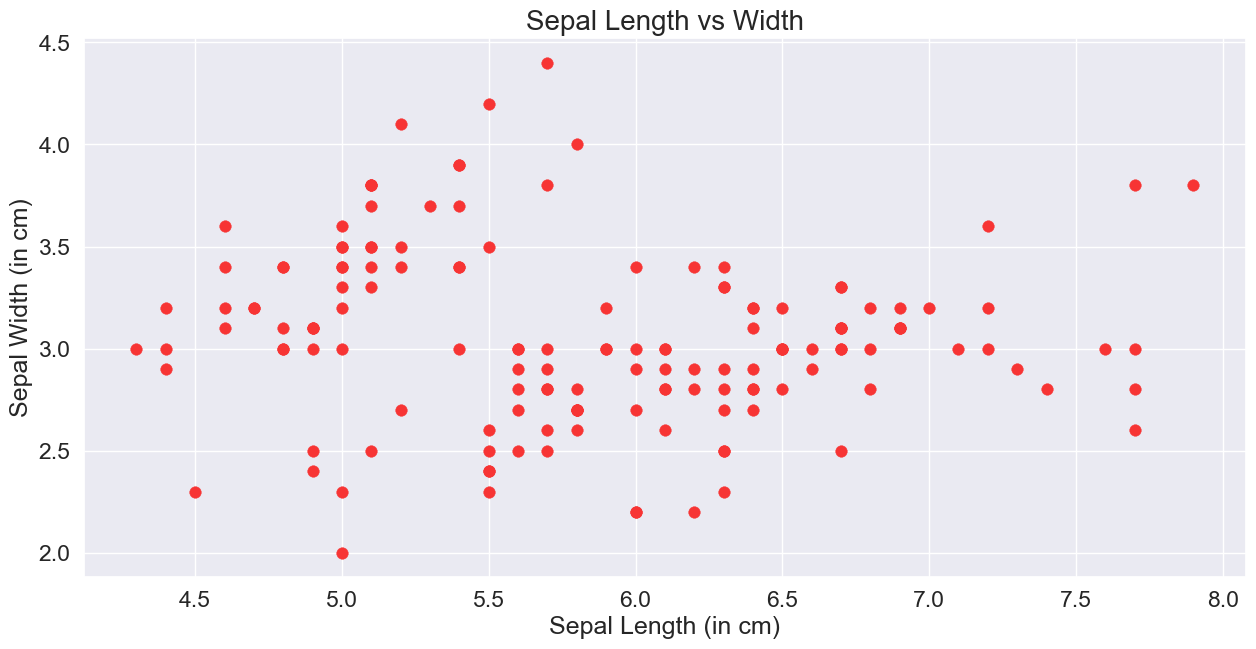

In [110]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'], s=70, color='#f73434',edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

In [112]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)

In [113]:
np.array(wcss)

array([680.8244    , 152.36870648,  78.94084143,  57.31787321,
        46.53558205,  38.95701116,  34.29998554,  29.95408642,
        27.87928788,  26.63665757])

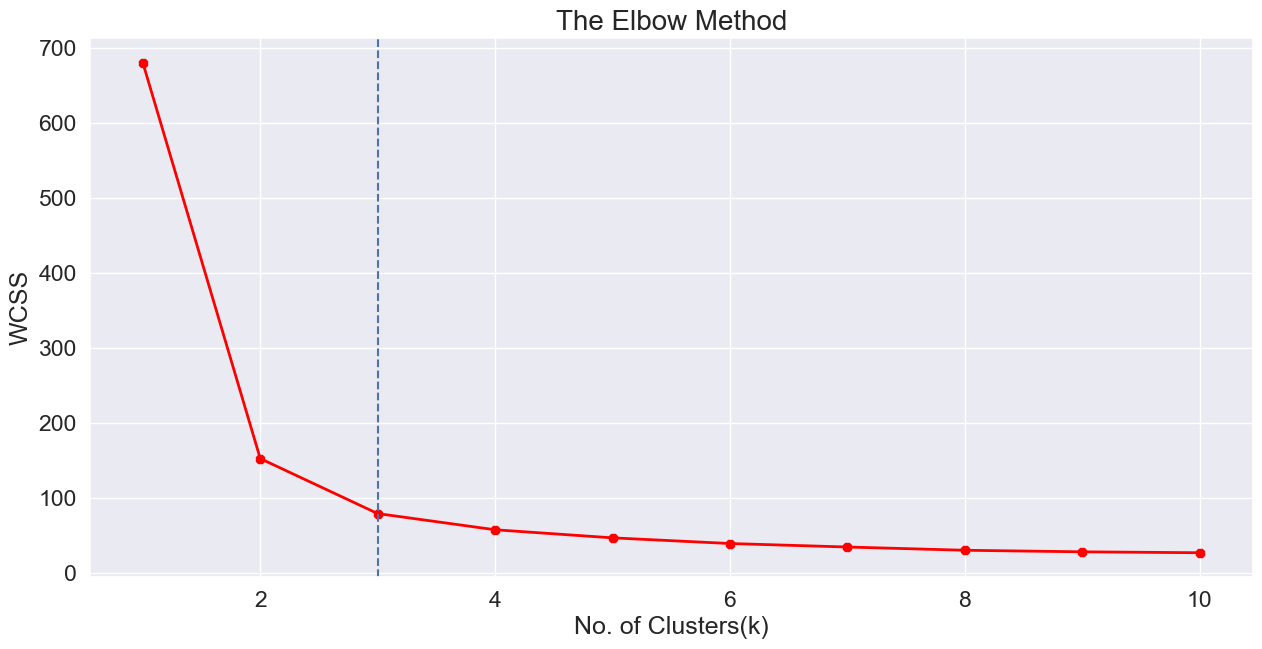

In [114]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters(k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [115]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(clustering_data)
KMeans(n_clusters=3)


KMeans(n_clusters=3)

In [ ]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

In [117]:
kms.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

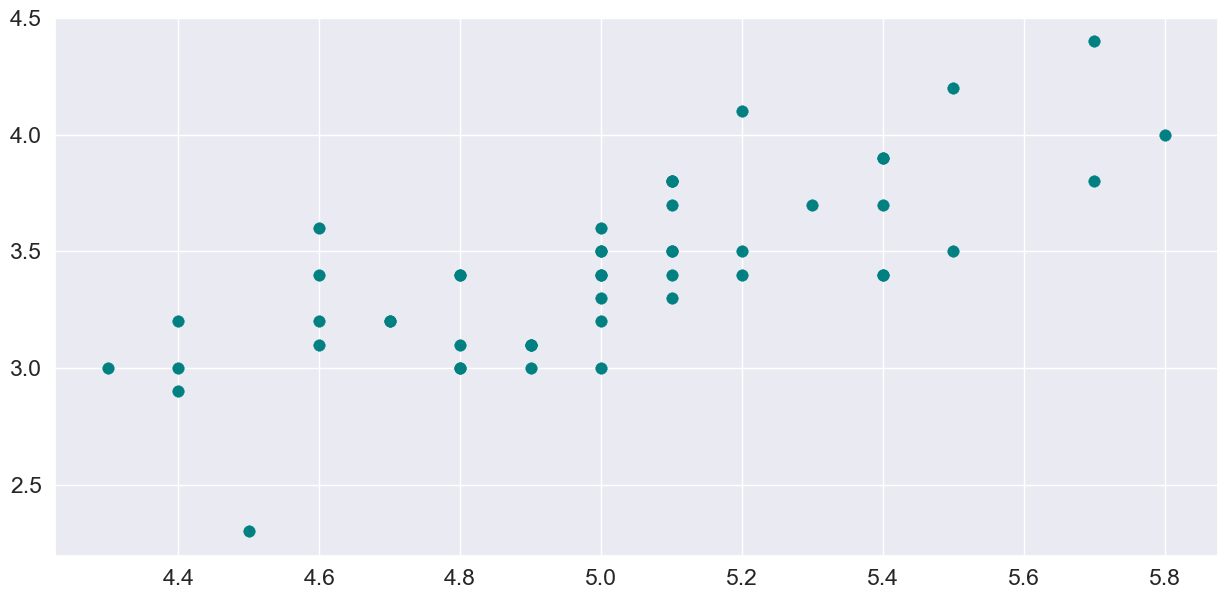

In [118]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
y=clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')

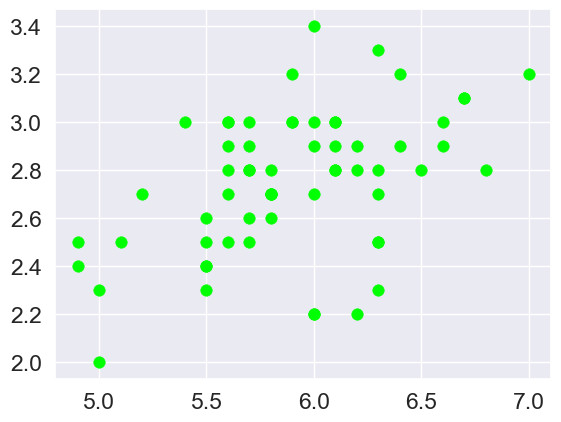

In [119]:
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
y=clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')

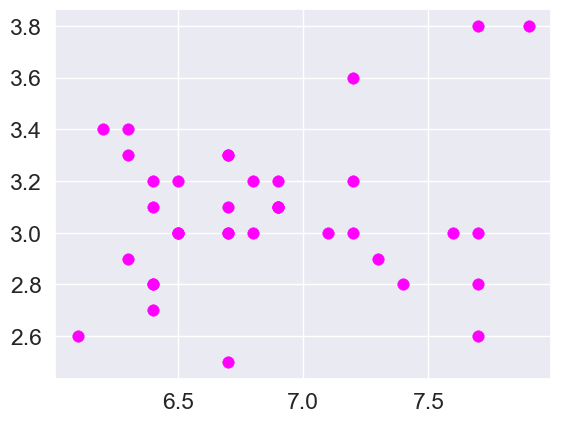

In [120]:
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

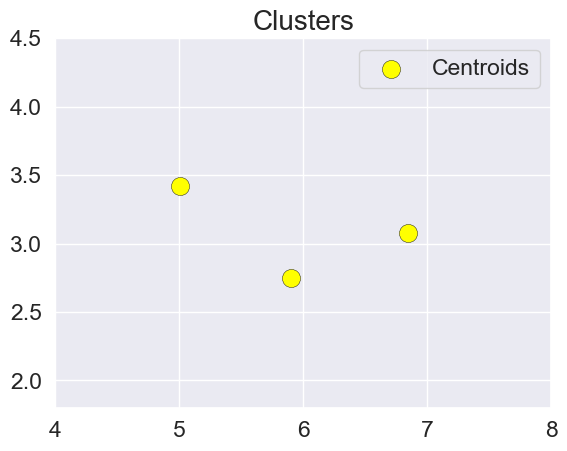

In [121]:
plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label =
'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()